## Customer Churn Analysis

In [1]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

##### Our target column is "Chrun".

## Exploratory Data Analysis (EDA)

In [3]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#I will drop the "customerID" column because it is not used in the predictive model
df = df.drop(columns="customerID")
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 20)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking Data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

17 columns have object datatype, 2 columns have integer datatype and one column has float datatype.We can observe that the "Total Charges" has continous data but it is stored in string format that's why it is showing an object type. We need to handle the column.

In [9]:
df.loc[df['TotalCharges']== " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


some columns have space as the value

In [10]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges columns has some space values which is replaced by nan values. Now we will handle the nan values after converting the column type object to float.

In [12]:
#converting the column type object to float
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [13]:
#checking the datatype changes
df["TotalCharges"].dtypes

dtype('float64')

Change is done now deal with nan values

In [14]:
#Filling the nan values
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Nan values are replaced with the mean of the column. As the column is continuous in nature.

In [16]:
#Describe the data 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# checking categorcial columns
df.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [18]:
# checking numeric columns
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Visualization

No     5174
Yes    1869
Name: Churn, dtype: int64


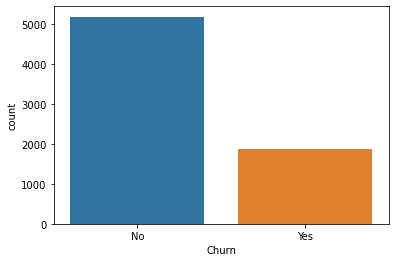

In [19]:
ax = sns.countplot (x = "Churn", data = df)
print(df["Churn"].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


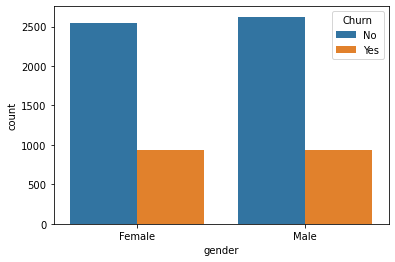

In [20]:
ax = sns.countplot (x = "gender", hue="Churn", data = df)
print(df["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


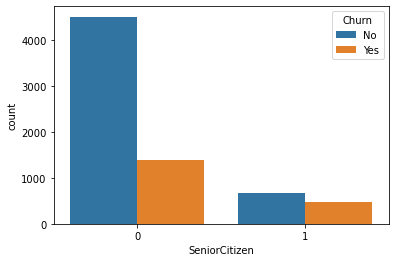

In [21]:
ax=sns.countplot(x="SeniorCitizen", hue="Churn", data = df)
print(df["SeniorCitizen"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


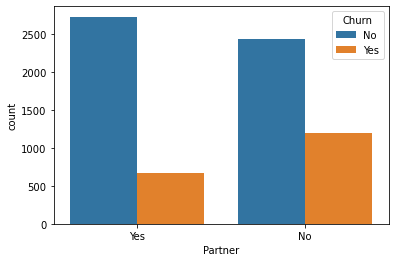

In [22]:
ax = sns.countplot (x = "Partner", hue="Churn", data = df)
print(df["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


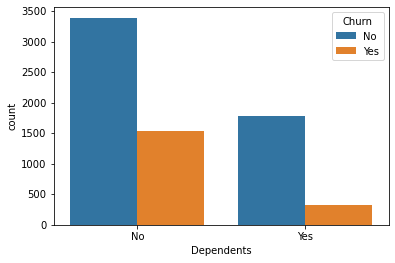

In [23]:
ax = sns.countplot (x = "Dependents", hue="Churn", data = df)
print(df["Dependents"].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


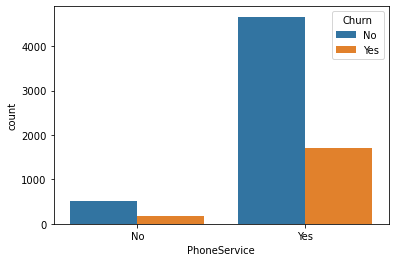

In [24]:
ax = sns.countplot (x = "PhoneService", hue="Churn", data = df)
print(df["PhoneService"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


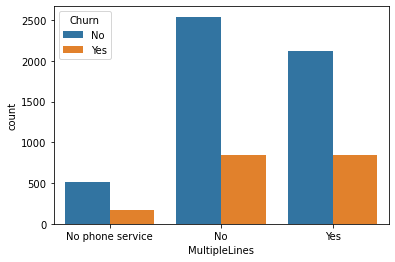

In [25]:
ax = sns.countplot (x = "MultipleLines", hue="Churn", data = df)
print(df["MultipleLines"].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


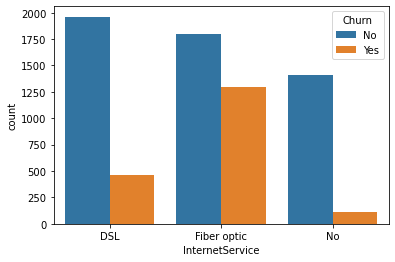

In [26]:
ax = sns.countplot (x = "InternetService", hue="Churn", data = df)
print(df["InternetService"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


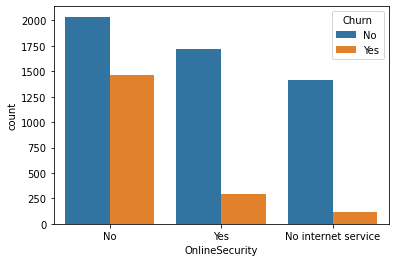

In [27]:
ax = sns.countplot (x = "OnlineSecurity", hue="Churn", data = df)
print(df["OnlineSecurity"].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


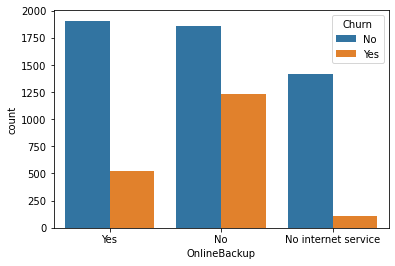

In [28]:
ax = sns.countplot (x = "OnlineBackup", hue="Churn", data = df)
print(df["OnlineBackup"].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


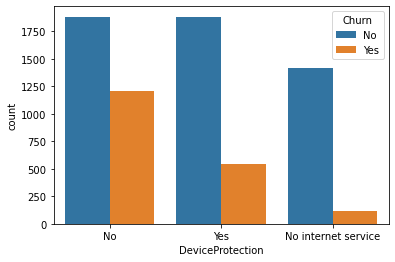

In [29]:
ax = sns.countplot (x = "DeviceProtection", hue="Churn", data = df)
print(df["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


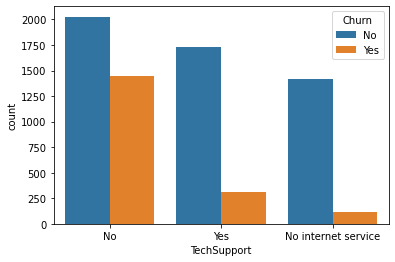

In [30]:
ax = sns.countplot (x = "TechSupport", hue="Churn", data = df)
print(df["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


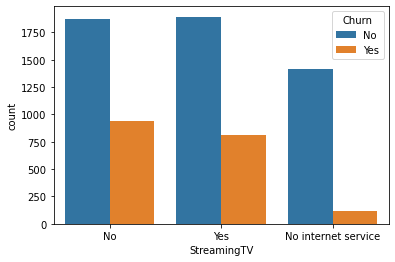

In [31]:
ax = sns.countplot (x = "StreamingTV", hue="Churn", data = df)
print(df["StreamingTV"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


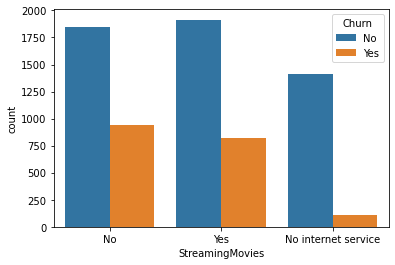

In [32]:
ax = sns.countplot (x = "StreamingMovies", hue="Churn", data = df)
print(df["StreamingMovies"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


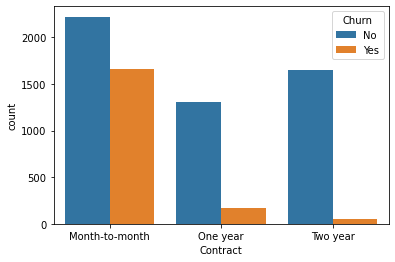

In [33]:
ax = sns.countplot (x = "Contract", hue="Churn", data = df)
print(df["Contract"].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


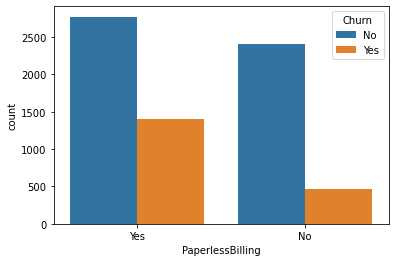

In [34]:
ax = sns.countplot (x = "PaperlessBilling", hue="Churn", data = df)
print(df["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


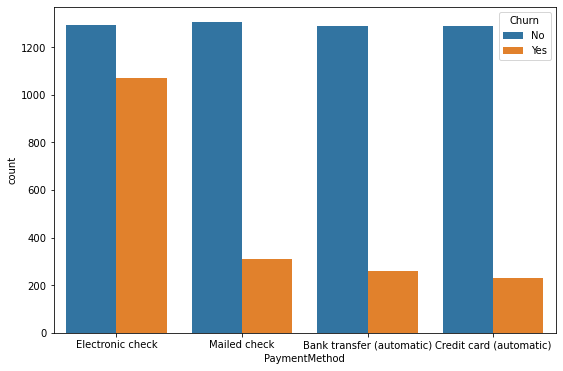

In [35]:
plt.figure(figsize=(9,6))
ax = sns.countplot (x = "PaymentMethod", hue="Churn", data = df)
print(df["PaymentMethod"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


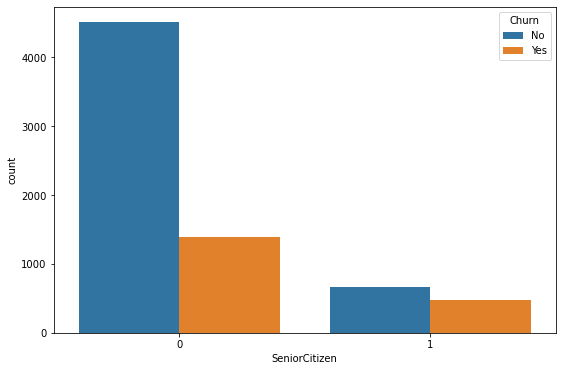

In [36]:
plt.figure(figsize=(9,6))
ax = sns.countplot (x = "SeniorCitizen", hue="Churn", data = df)
print(df["SeniorCitizen"].value_counts())

<AxesSubplot:xlabel='tenure', ylabel='Density'>

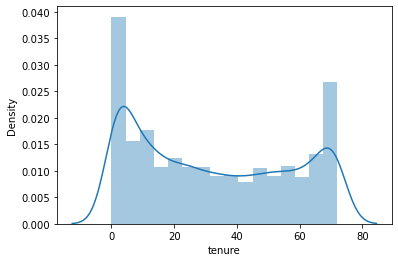

In [37]:
sns.distplot(df['tenure'], kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

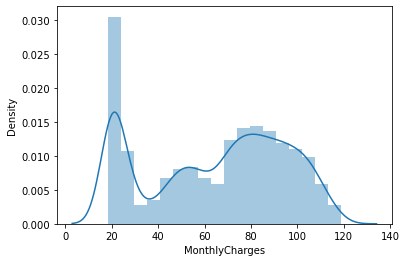

In [38]:
sns.distplot(df['MonthlyCharges'], kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

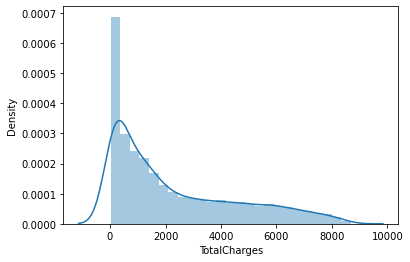

In [39]:
sns.distplot(df['TotalCharges'], kde=True)

### Encoding of Dataframe:

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 
          'PaymentMethod', 'Churn'):
    df[i] = le.fit_transform(df[i])

In [41]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [42]:
# Checking corelation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


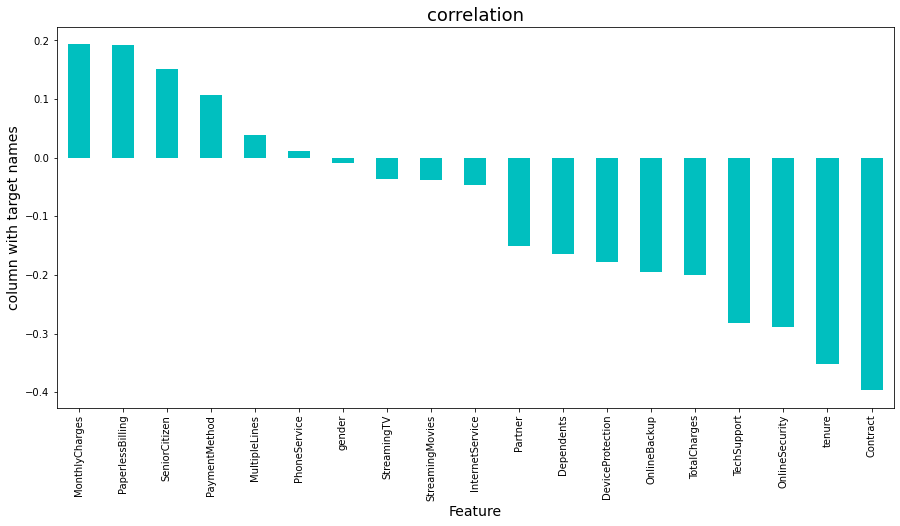

In [43]:
#checking correlation high to low 
plt.figure(figsize=(15,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color ='c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize = 18)
plt.show()

Churn is positivly highest corelated with MonthlyCharges and negatively least corelated with Contract column

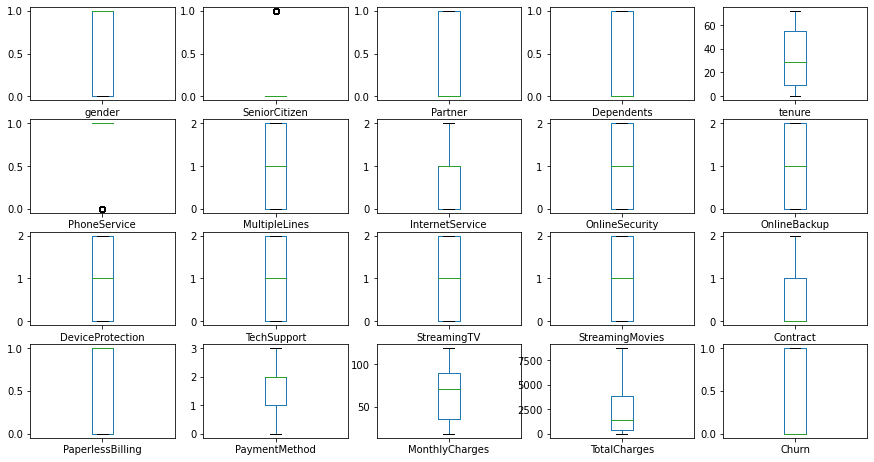

In [44]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(5,5), figsize=(15,10));

In [45]:
df.shape

(7043, 20)

In [46]:
#outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [58]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [59]:
df_new_z.shape

(6361, 20)

In [60]:
#Percentage loss of data:
Data_loss=((7043 - 6361)/7043)*100
Data_loss

9.683373562402386

Our data is becoming biased because data loss is high. Thus, I am not going to remove outliers

In [61]:
#Separating the column
x = df.drop("Churn",axis = 1)
y = df["Churn"]

In [62]:
#Spliting data by train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

### Model Building

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy on training data: {:,.3f}'.format(lr.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(lr.score(x_test, y_test)))

Accuracy on training data: 0.806
Accuracy on test data: 0.793


In [80]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_model = rf.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

print('Accuracy on training data: {:,.3f}'.format(rf.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(rf.score(x_test, y_test)))

Accuracy on training data: 0.997
Accuracy on test data: 0.779


In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [82]:
print(confusion_matrix(y_test, rf_pred))

[[922 119]
 [193 175]]


In [83]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.48      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [84]:
#Confusion Matrix for Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7217885024840313
Confusion Matrix: [[833 208]
 [184 184]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.47      0.50      0.48       368

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



In [85]:
# Cross Validation
pred_train = lr.predict(x_train)
pred_test =lr.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
max_accu=0
max_rs=0

In [86]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > max_accu:
        max_accu = cv_mean
        max_rs = j
    print(f'At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')
    print('\n')

At cross fold 2 cv score is 0.7998010154373507 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 3 cv score is 0.8027835624247078 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 4 cv score is 0.8016472755665687 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 5 cv score is 0.8016482918252791 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 6 cv score is 0.8036363077438468 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 7 cv score is 0.8027832437916127 and accuracy score training is 0.8056443024494143 and accuracy for the testing is 0.7927608232789212


At cross fold 8 cv score is 0.8007976150552059 and accuracy score training is 0.8056443024494143 and

In [87]:
#Cross Validation for Logistic Regrssion:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Logistic Regression',cv_mean)

Cross validation score for Logistic Regression 0.7979583193152879


In [88]:
#Cross Validation for Decision Tree Classifier:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Decision Tree',cv_mean)

Cross validation score for Decision Tree 0.7323540481030363


In [89]:
# Regularization
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [90]:
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [91]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
lss= accuracy_score(y_test,pred_test)
lss

0.7927608232789212

In [92]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.2670973017054664

In [93]:
# Ensemble technique
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(2,15),'criterion':['gini','entrophy']}
rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [94]:
rf=DecisionTreeClassifier(criterion='gini',max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score: ',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

Accuracy Score:  73.81121362668559
Cross Validation Score: 74.24383226337183


We are getting Logistic Regression model accuracy and cross validation 79% which is good. 

In [106]:
import pickle
filename = 'churn.pkl'
pickle.dump(lr,open(filename,'wb'))

In [107]:
#Loading Model:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7927608232789212


In [99]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [100]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0
Orginal,0,0,0,0,1,1,0,1,0,0,...,0,1,1,0,1,1,1,0,0,1
